In [1]:
import chess

In [2]:
fen = "3Q4/4K3/8/2k5/8/8/8/8 w - - 0 1"

In [3]:
b = chess.Board(fen)

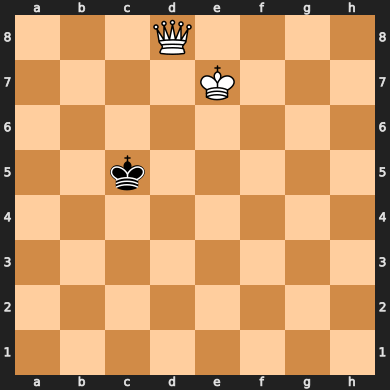

In [4]:
b

In [5]:
from node import Node
from mcts import MonteCarloTreeSearch

Loading NNCPU : nn-04cf2b4ed1da.nnue
NNCPU loaded !


In [6]:
_board = chess.Board(fen)
root_node = Node(fen, None, _board.turn, 0, 0, None)
monte_carlo = MonteCarloTreeSearch(root_node, 1)

In [7]:
from tqdm import tqdm

In [8]:
res = []
for _ in tqdm(range(100)):
    res.append(monte_carlo.simulation(root_node))

100%|██████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 279.68it/s]


In [9]:
from collections import Counter

In [10]:
Counter(res)

Counter({'1/2-1/2': 100})

In [11]:
Counter(res)

Counter({'1/2-1/2': 100})

In [12]:
38/5000

0.0076

In [13]:
probs = [0.1, 0.2]

In [14]:
import numpy as np

In [15]:
chances = np.array(probs)

In [16]:
chances

array([0.1, 0.2])

In [18]:
res2 = []
for _ in tqdm(range(1000)):
    res2.append(monte_carlo.simulation_nn(root_node))

100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 47.64it/s]


In [19]:
Counter(res2)

Counter({'1/2-1/2': 1000})

In [20]:
current_node = root_node

In [27]:
import math
import random
from ctypes import *

nnue = cdll.LoadLibrary("./libnncpuprobe.so")
nnue.nncpu_init(b"nn-04cf2b4ed1da.nnue")

Loading NNCPU : nn-04cf2b4ed1da.nnue
NNCPU loaded !


0

In [29]:
from IPython.display import display

In [48]:
import numpy as np

In [49]:
chances = np.array(probs2)

In [54]:
len(chances)

25

In [51]:
chances

array([1.52248721e-008, 2.06046238e-009, 6.30300223e-016, 2.39768349e-145,
       2.59103096e-175, 2.53384485e-089, 1.77166178e-144, 4.23195185e-094,
       1.63945714e-114, 2.34476472e-059, 4.07819052e-041, 8.82058464e-146,
       1.50028245e-041, 2.31874494e-016, 7.55328504e-086, 1.75820236e-025,
       2.22661658e-039, 8.75357411e-027, 1.15443513e-017, 2.60940367e-023,
       3.35350125e-004, 4.58939882e-048, 1.87889848e-012, 9.99664633e-001,
       6.63745047e-036])

In [52]:
chances += 0.5

In [53]:
chances

array([0.50000002, 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.50033535, 0.5       , 0.5       , 1.49966463, 0.5       ])

In [55]:
np.sum(chances)

13.5

In [56]:
chances /= np.sum(chances)

In [57]:
np.sum(chances)

1.0

In [58]:
chances

array([0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03706188, 0.03703704, 0.03703704, 0.11108627, 0.03703704])

In [59]:
1/13.5

0.07407407407407407

In [60]:
chances[0]

0.037037038164805344

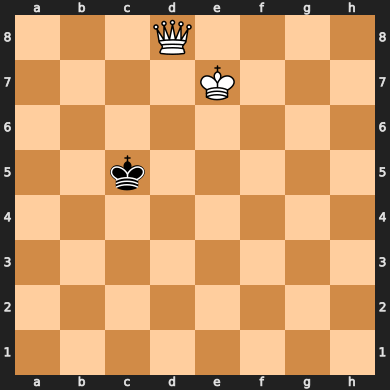

Qg8


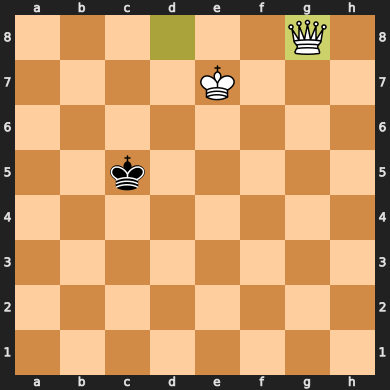

Kb6


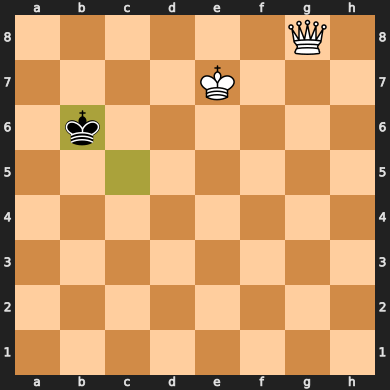

Qf8


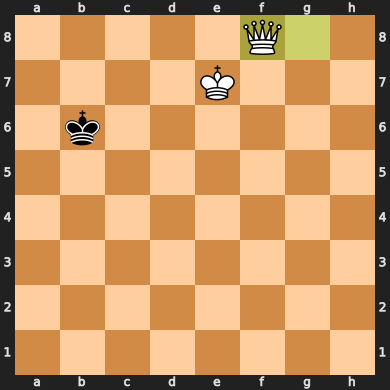

Kb7


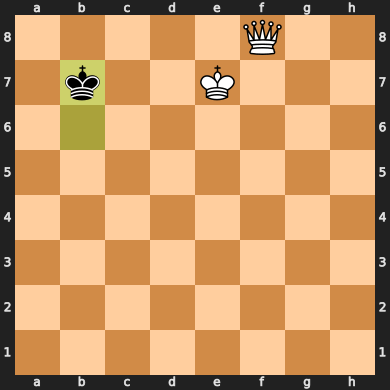

Qg8


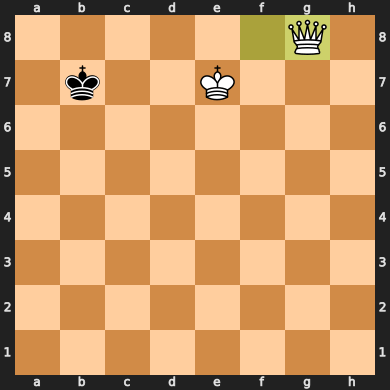

Ka7


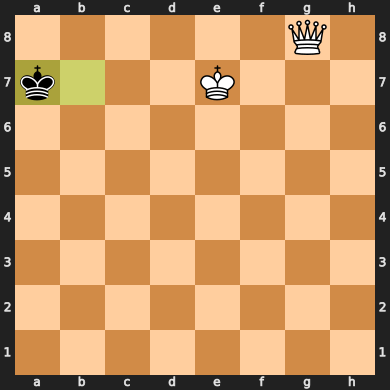

Qf8


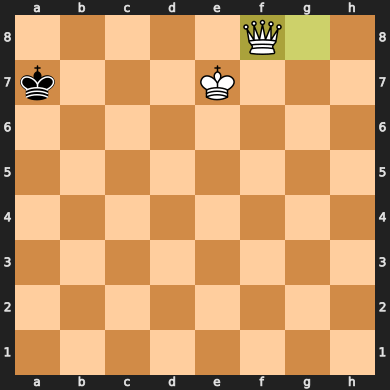

Kb6


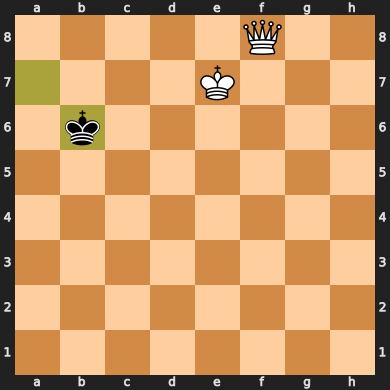

Qg8


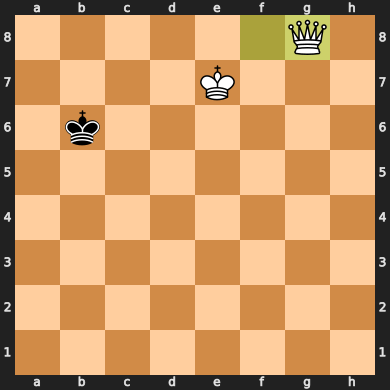

Kb7


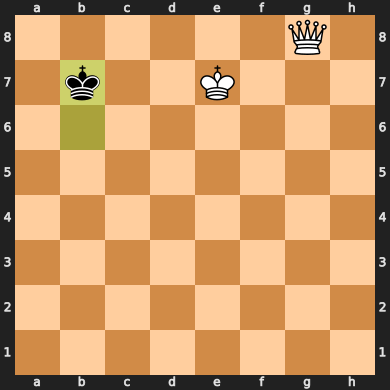

Qf8


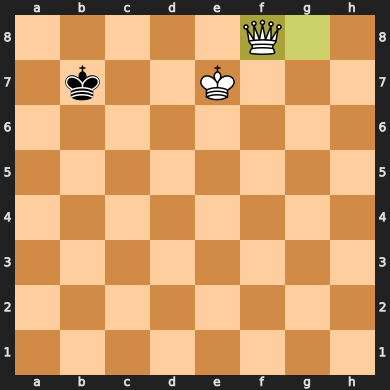

Ka7


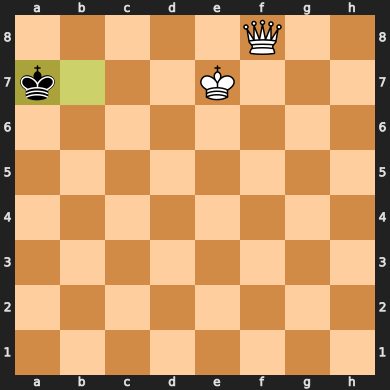

Qg8


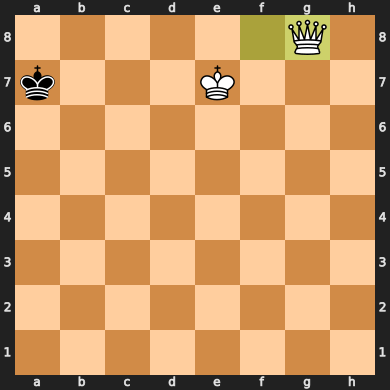

Kb6


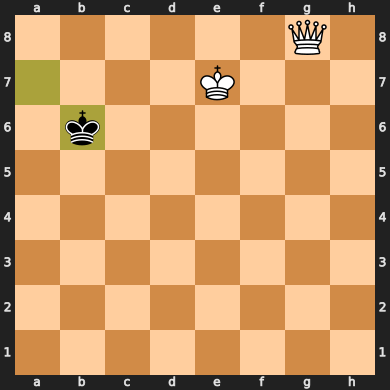

Qf8


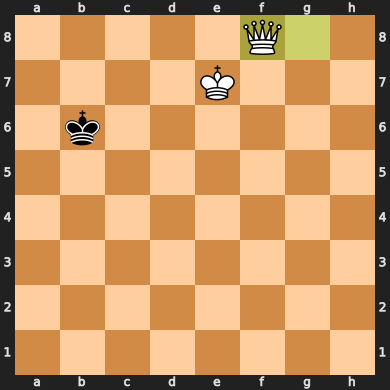

Kb7


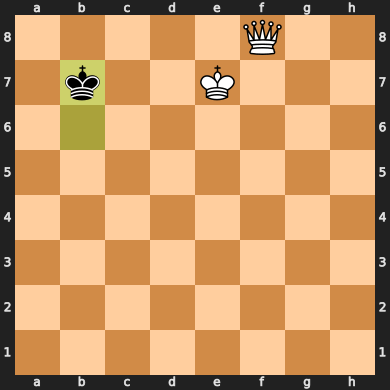

Qg8


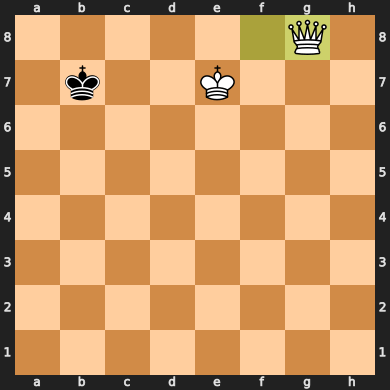

Ka7


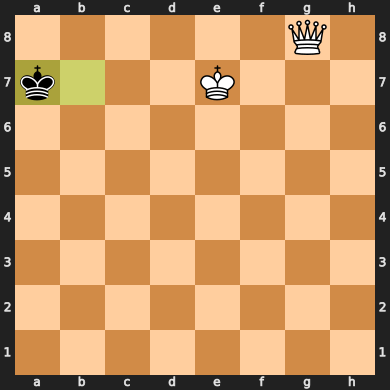

Qf8


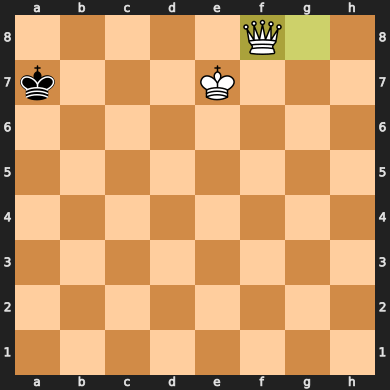

Kb6


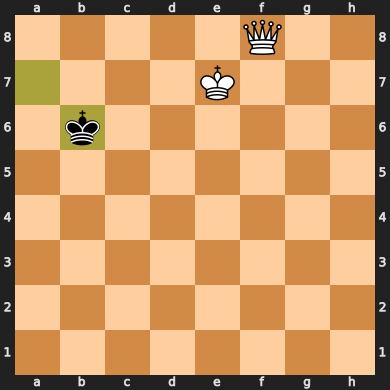

Qg8


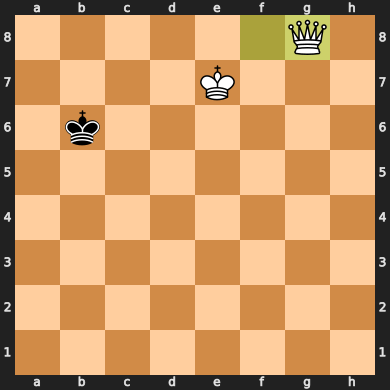

Kb7


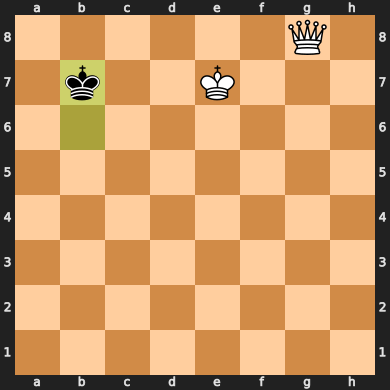

Qf8


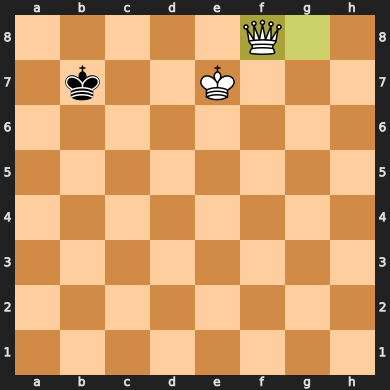

Ka7


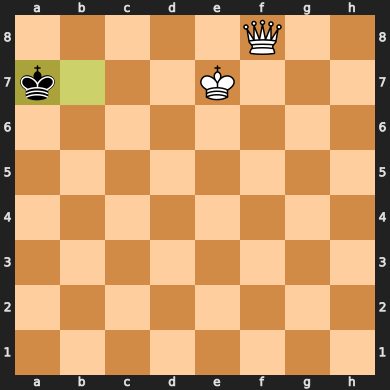

Qg8


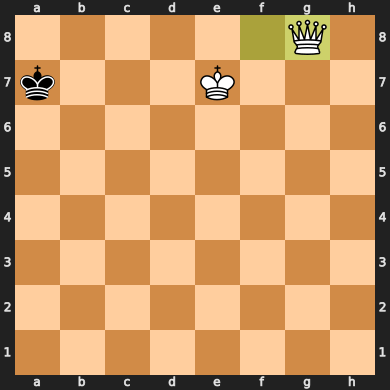

Kb6


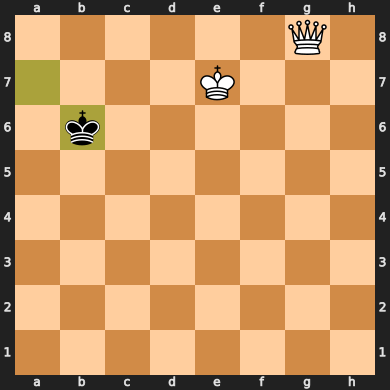

Qf8


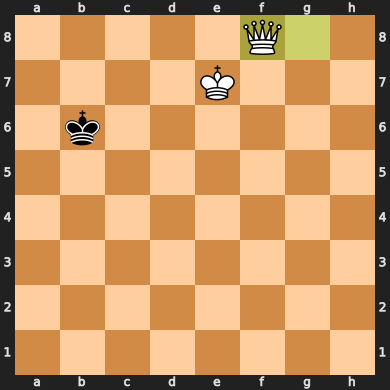

Kb7


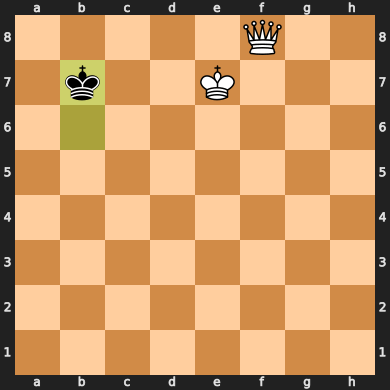

Qg8


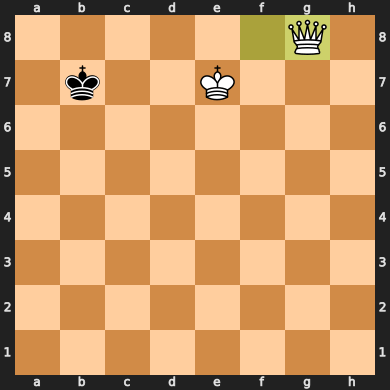

Ka7


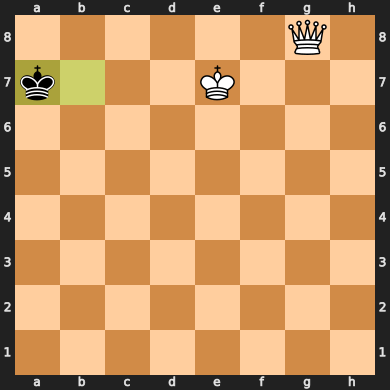

Qf8


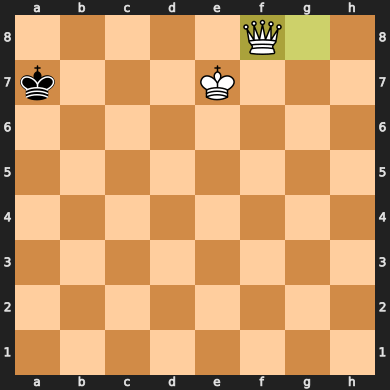

Kb6


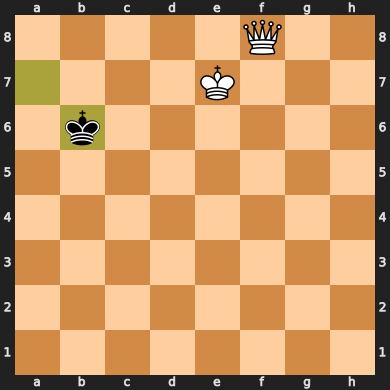

Qg8


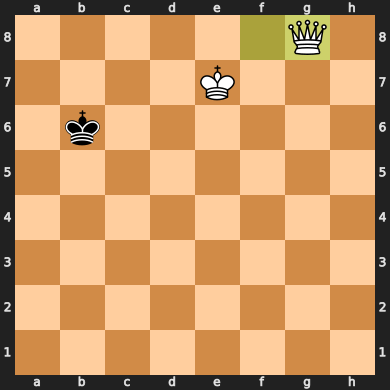

Kb7


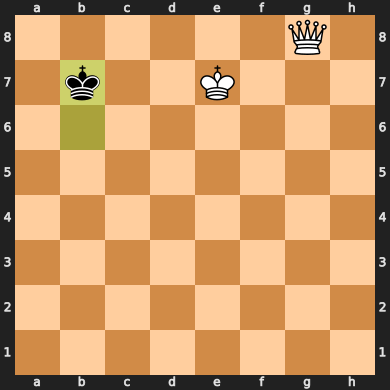

Qf8


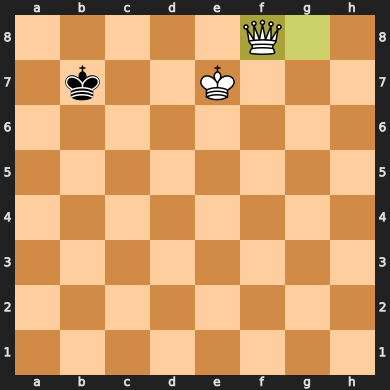

Ka7


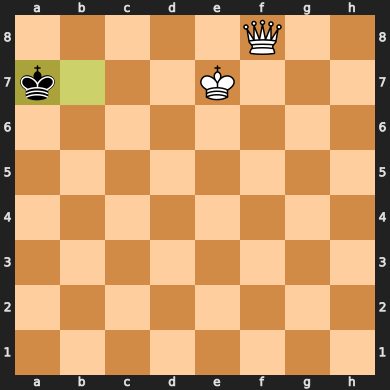

Qg8


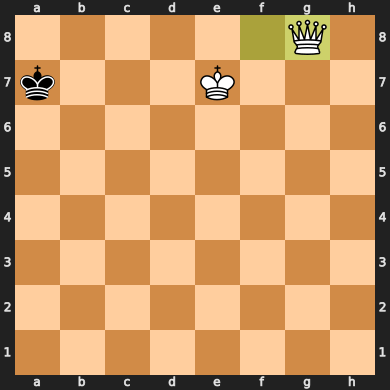

Kb6


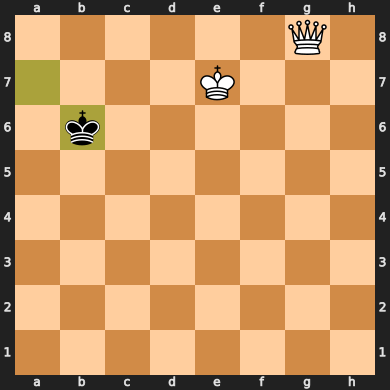

Qf8


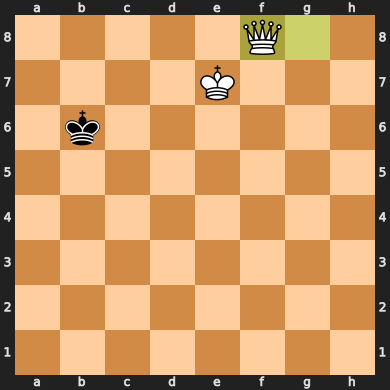

Kb7


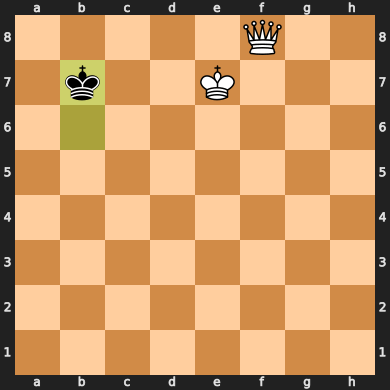

Qg8


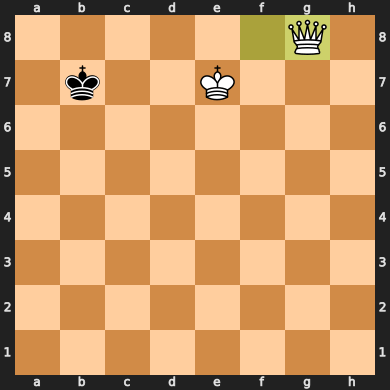

Ka7


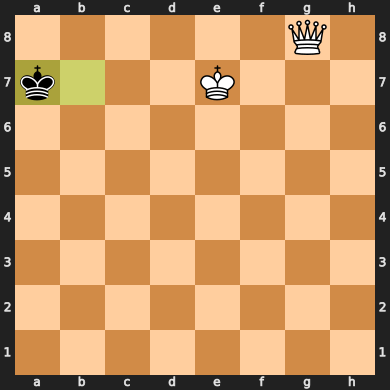

Qf8


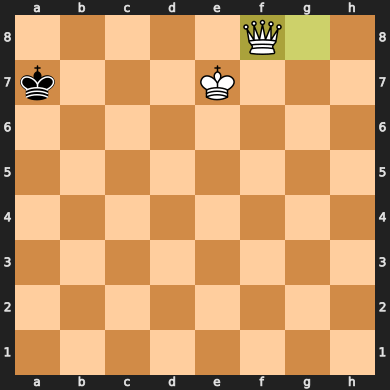

Kb6


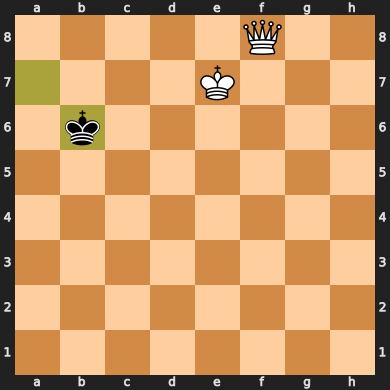

Qg8


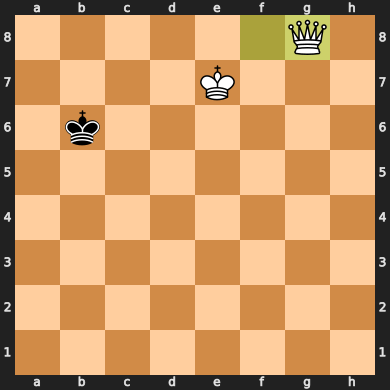

Kb7


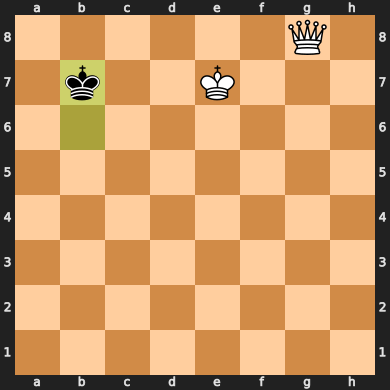

Qf8


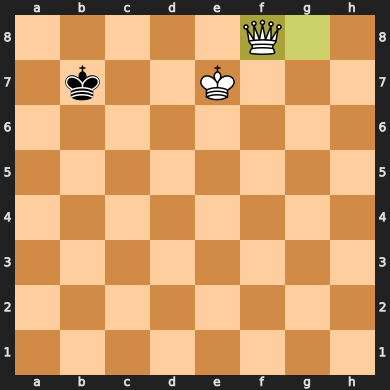

Ka7


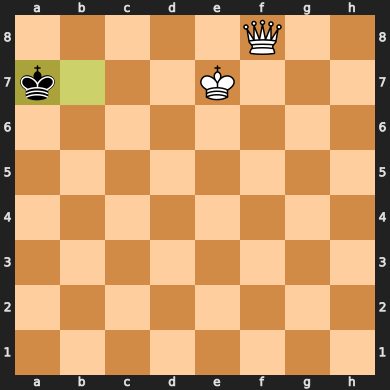

Qg8


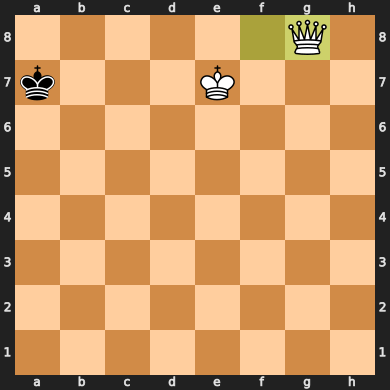

Kb6


In [61]:
board = chess.Board(current_node.fen)
# print('fen: ', current_node.fen)
while not board.is_game_over():
    legal_moves = list(board.legal_moves)
    # print('legal moves: ', legal_moves)
    probs = []
    for m in legal_moves:
        temp_board = board.copy()
        temp_board.push(m)
        fen = temp_board.fen()
        score = nnue.nncpu_evaluate_fen(fen.encode())
        probs.append(score)
    # print('scores before normalizing: ', probs)
    probs = [prob - max(probs) for prob in probs]
    probs2 = probs[:]
    # print('scores after normalizing: ', probs)
    denominator = 0
    for p in probs:
        denominator += math.e**p
    # print('denominator: ', denominator)
    probs[0] = math.e**probs[0] / denominator
    
    chances = np.array(probs)
    chances += 0.5
    chances /= np.sum(chances)
    for i in range(len(probs)):
        probs[i] = chances[i]
    
    for i in range(len(probs) - 1):
        probs[i + 1] = math.e**probs[i + 1] / denominator + probs[i]
    for i in range(len(probs2)):
        probs2[i] = math.e**probs2[i] / denominator
    # print('probabilities: ', probs)
    random_number = random.random()
    # print('random_number: ', random_number)
    move = None
    for i in range(len(probs)):
        if (random_number <= probs[i]):
            move = legal_moves[i]
            break

    
    # display(board)
    # print(board.san(move))

    board.push(move)


